## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [3]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [4]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


### **Let us check the data types and and missing values of each column** 

In [6]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights: 
New_Price is the column with the highest number of missing values. Price, which is the target variable, has missing values equal to 1234. Seats have only 53 values missing. There are 175 missing values attributed to the Power column. The engine column contains 46 missing values, whereas the Mileage has only two values missing.**

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [8]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop("S.No.",axis=1,inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [9]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights:
We can see that the variable Year and Mileage are negatively skewed with the variable as the mean is less than the median. On the other hand, variables Engine, Power, Seats, New_price, and Price are positively skewed, with variables New_price and Price being the most positively skewed i.e. mean is greater than median**

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [10]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
data.describe(include = ['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [11]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].unique())
    
    print('-'*50)

For column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------------------------------------
For column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------------------------------------
For column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------------------------------------
For column: Transmission
['Manual' 'Automatic']
--------------------------------------------------
For column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
--------------------------------------------------


#### **Observations and Insights: There is a very large variety of Names for the Car. The cities category is limited to Mumbai, Pune, Chennai, Coimbatore, Hyderabad, Jaipur, Kochi, Kolkata, Delhi, Bangalore, and Ahmedabad. Fuel_type contains unique entries for CNG, Diesel, Petrol, LPG, and Electric. Transmission belongs to either Automatic or Manual. Lastly, Owner_type contains category of First, Second, Fourth & Above and Third.**

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [12]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values("Kilometers_Driven",ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [13]:
data.sort_values("Kilometers_Driven",ascending = False).tail(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
6201,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.70,796.0,47.30,5.0,3.99,NaN
5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17,799.0,53.30,5.0,4.45,3.40
1161,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,20.30,1199.0,84.00,5.0,NaN,6.85
6760,Fiat Avventura Urban Cross 1.3 Multijet Emotion,Kolkata,2019,1000,Diesel,Manual,First,20.50,1248.0,91.72,5.0,9.26,NaN
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.90,1197.0,81.86,5.0,7.39,6.50
5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.19,1197.0,81.86,5.0,10.25,8.60
1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.49,2179.0,138.03,5.0,NaN,7.50
1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.60,1999.0,177.00,5.0,52.77,40.00
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.50,1197.0,81.80,5.0,6.80,6.25
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.70,796.0,47.30,5.0,NaN,3.60


In [14]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(index=2328,inplace = True)

**Check Mileage extreme values**

In [15]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values("Mileage").head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN


In [16]:
data.sort_values("Mileage").tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,5.35,3.25
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,3.05
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,3.90
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.00,5.0,13.58,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.00,5.0,NaN,12.75


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [17]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

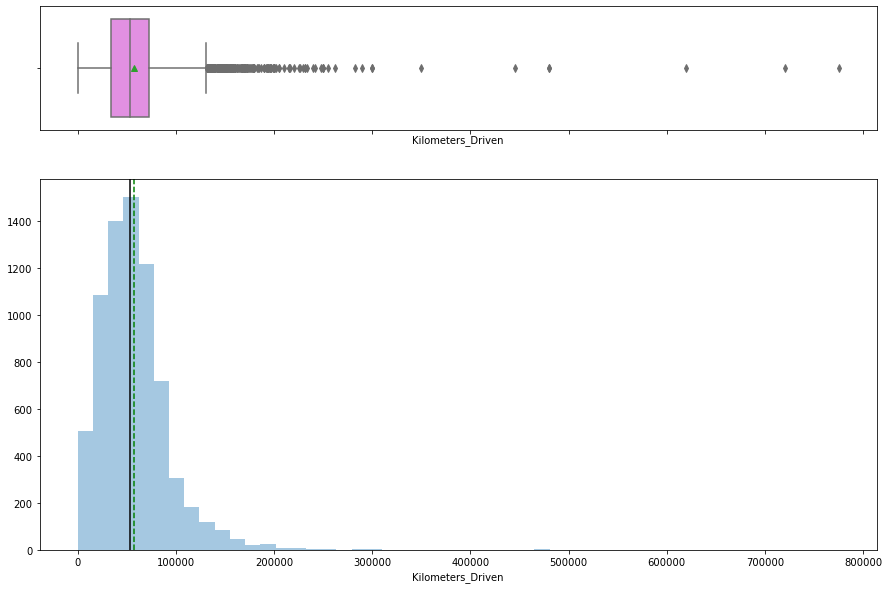

In [18]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

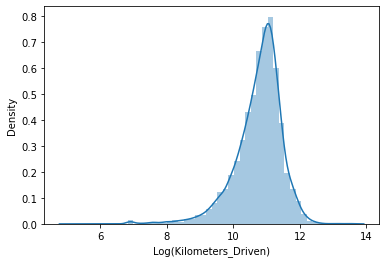

In [19]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: Skewness, to a great extent has been eliminated, and the distribution seems to adopt a normal distribution. A very small amount of skewness is still present towards the left side.**

In [20]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

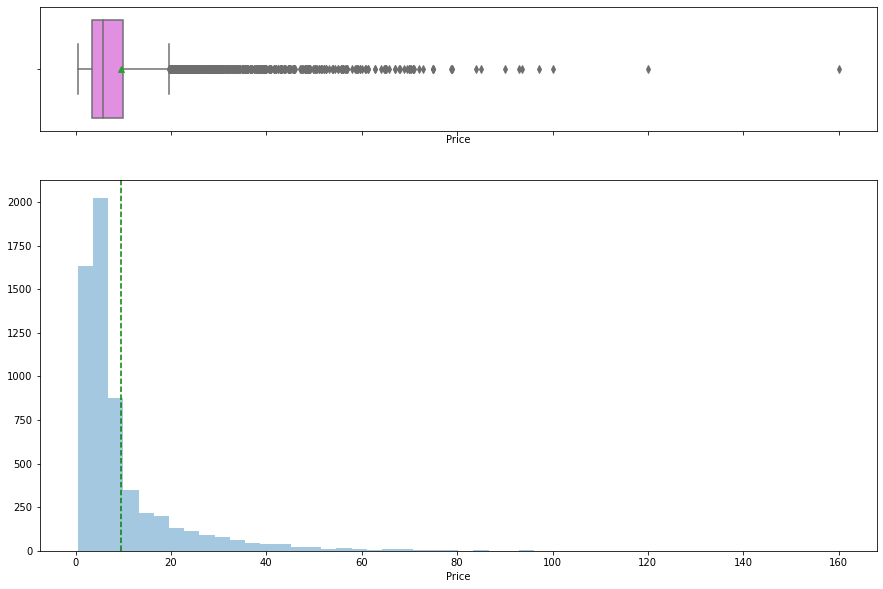

In [21]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

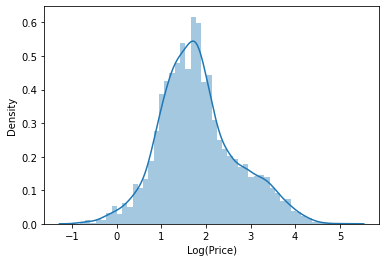

In [22]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

In [23]:
data["Price_log"] = np.log(data["Price"])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

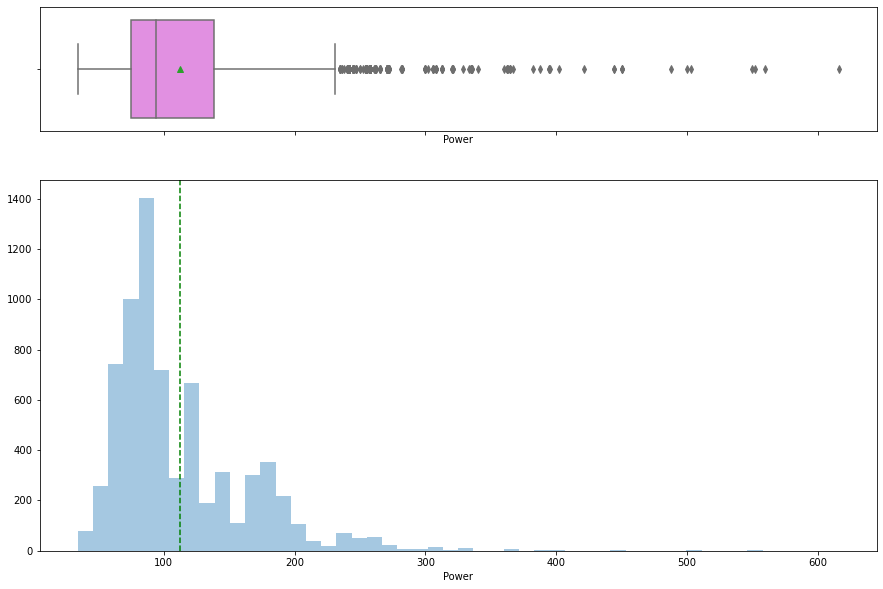

In [24]:
# Plot histogram and box-plot for 'Power'
histogram_boxplot(data['Power'])

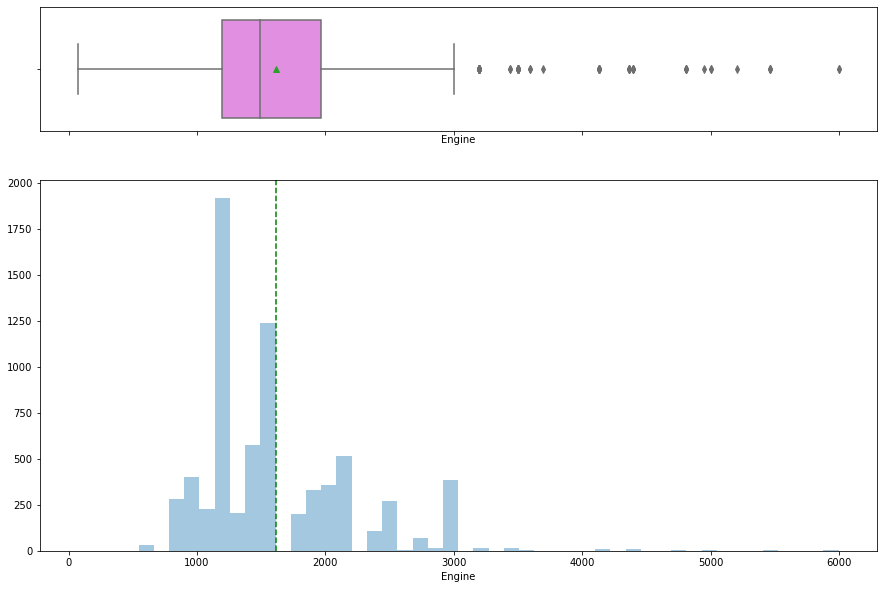

In [25]:
# Plot histogram and box-plot for 'Engine'
histogram_boxplot(data['Engine'])

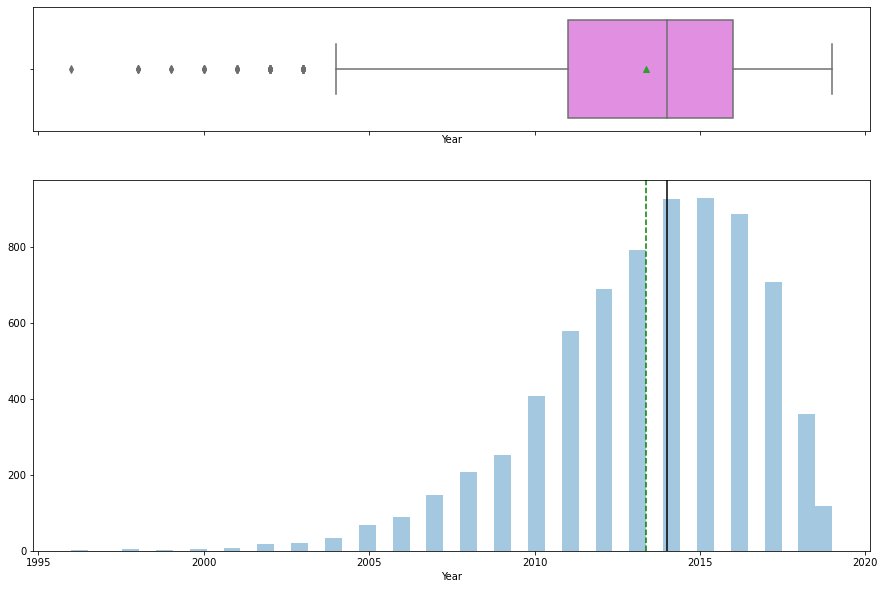

In [26]:
# Plot histogram and box-plot for 'Year'
histogram_boxplot(data['Year'])

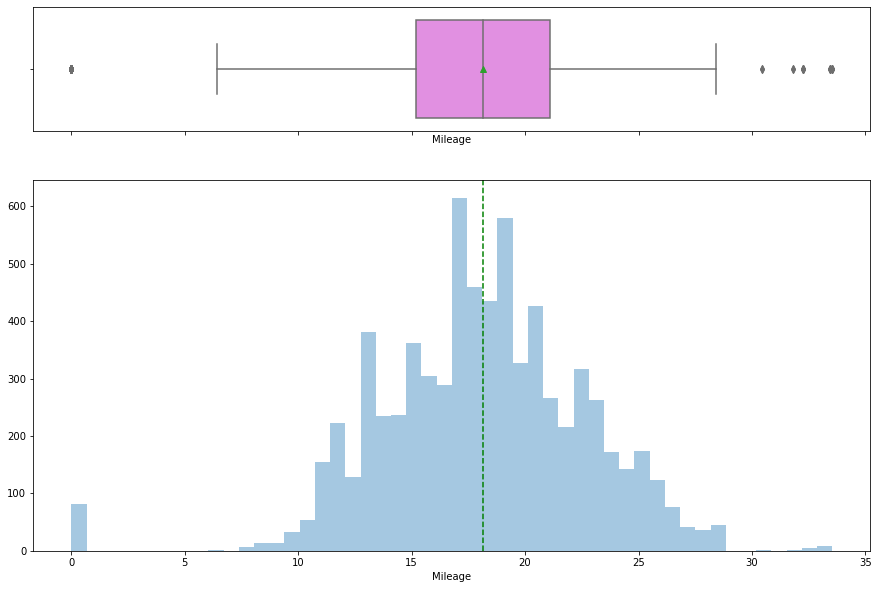

In [27]:
# Plot histogram and box-plot for 'Mileage'
histogram_boxplot(data['Mileage'])

**Observations and Insights for all the plots: The distribution for the variable Year, as before, is negatively skewed, with a significant amount of outliers, considering the boxplot.
The distribution for the variable Mileage is also negatively skewed, with outliers lying on both sides of the distribution.
Just like the information before, the distribution for the variable Engine and Power is positively skewed, with a significant amount of outliers.
However, the variable New_price seems to be containing a lot of outliers, with distribution being positively skewed as well.**


## **2. Univariate analysis - Categorical Data**

In [28]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

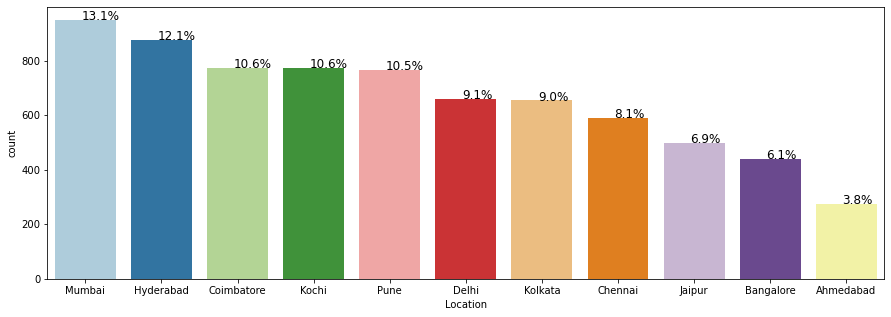

In [29]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

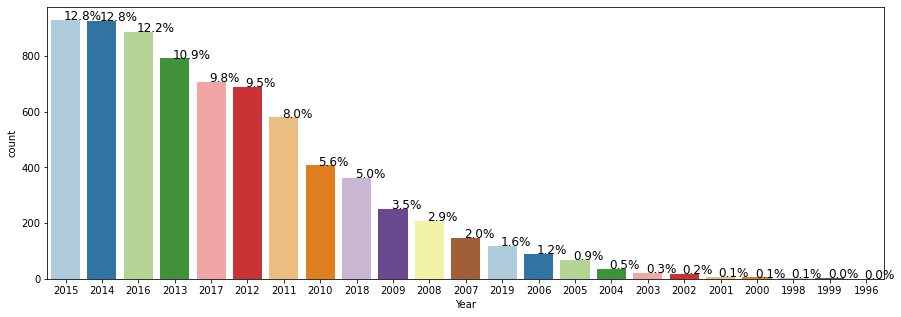

In [30]:
# Bar Plot for 'Year'
perc_on_bar('Year')

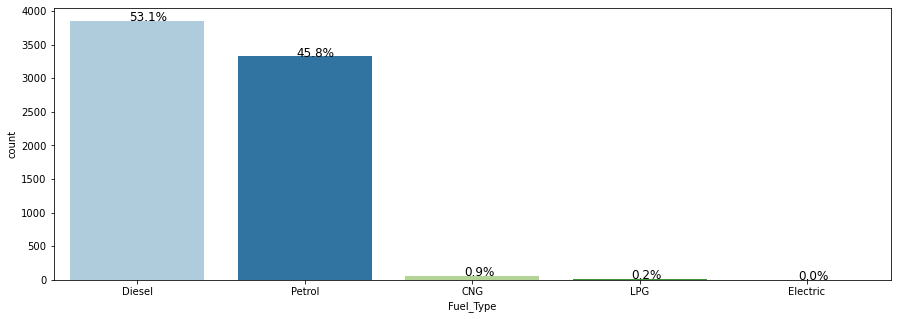

In [31]:
# Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

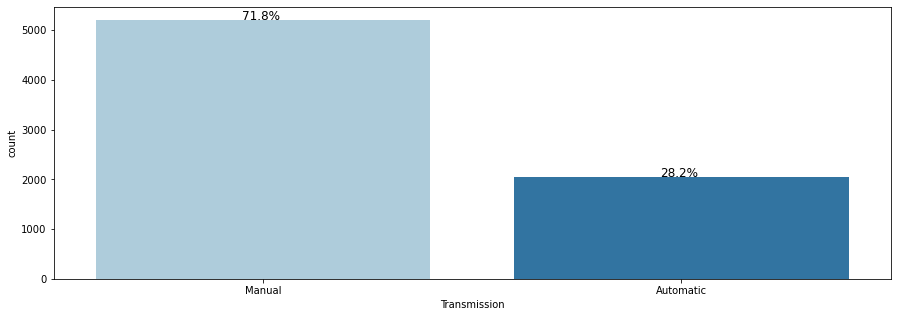

In [32]:
# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

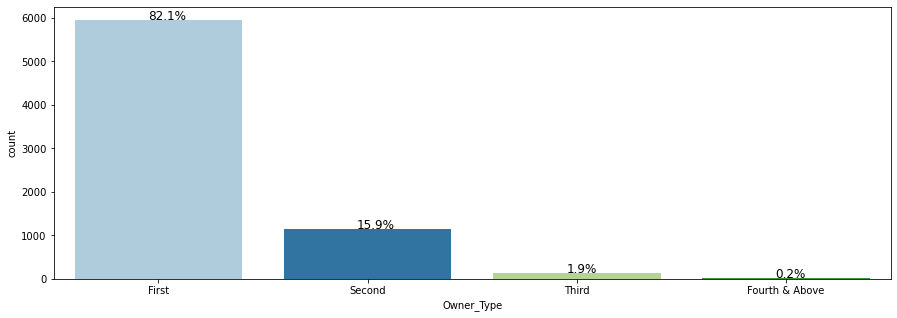

In [33]:
# Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

**Observations and Insights from all plots: The largest percentage of cars i.e. 13.6% of the cars belong to the city of Mumbai, with the least percentage of cars belonging to the city of Ahmedabad(3.8%). 2015 and 2016 turned out to be the highest proportion in the manufacturing year category, with the least percentage of cars belonging to 1999 and 1996 (almost zero). More than half of the cars operated on diesel with almost no car being electric. 71.8% (almost 3/4th ) of all the cars had a manual transmission, with the rest of them having an automatic transmission. Lastly, first ownership in the category seemed to be the most significant one (82.1%) with very few i.e. 0.2% belonging to fourth & above**

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='kilometers_driven_log'>

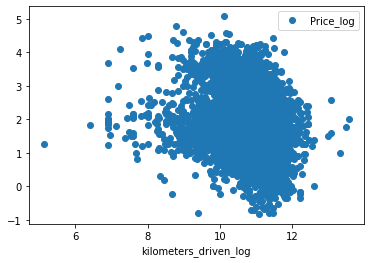

In [34]:
# Let us plot pair plot for the variables 'kilmetres_driven_log' and 'price_log'
data.plot(x ='kilometers_driven_log', y = 'Price_log', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

<AxesSubplot:xlabel='Year'>

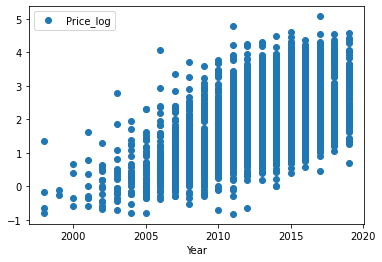

In [35]:
# Let us plot pair plot for the variables 'Year' and 'price_log'
data.plot(x ='Year', y = 'Price_log', style = 'o')

<AxesSubplot:xlabel='Engine'>

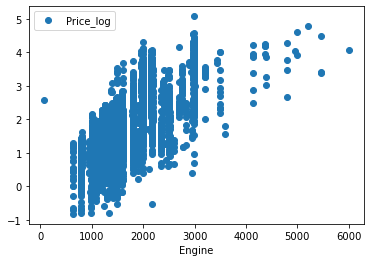

In [36]:
# Let us plot pair plot for the variables 'Engine' and 'price_log'
data.plot(x ='Engine', y = 'Price_log', style = 'o')

<AxesSubplot:xlabel='Power'>

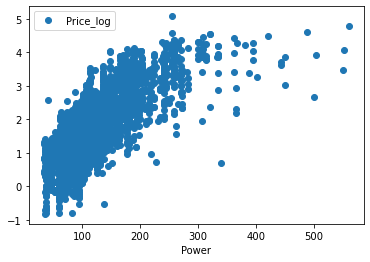

In [37]:
# Let us plot pair plot for the variables 'Power' and 'price_log'
data.plot(x ='Power', y = 'Price_log', style = 'o')

<AxesSubplot:xlabel='Mileage'>

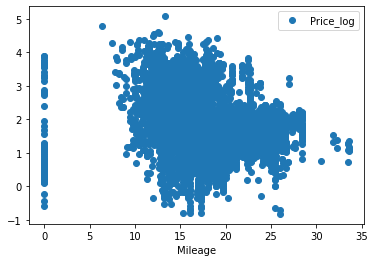

In [38]:
# Let us plot pair plot for the variables 'Mileage' and 'price_log'
data.plot(x ='Mileage', y = 'Price_log', style = 'o')

<AxesSubplot:xlabel='Seats'>

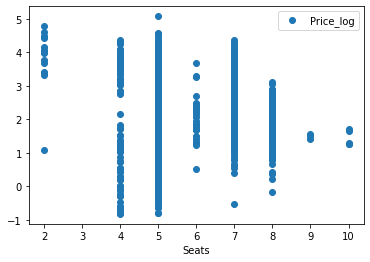

In [39]:
# Let us plot pair plot for the variables 'Seats' and 'price_log'
data.plot(x ='Seats', y = 'Price_log', style = 'o')

**Observations and Insights from all plots:** 

**There seems to be no visible trend between price_log and kilometers_driven. However, a lot of data seems to be scattered between 8 to 12 kilometers.**

**We can observe an increasing trend between price_log and year. However, there seem to be more used cars manufactured in 2010 onwards, causing prices to be higher then.**

**We can observe an increasing trend between price_log and Engine. However, most of the values lie between 1000 CC and 3000 CC, indicating that majority of the used cars have engines belonging to those values. There seem to be a few outliers as well.**

**We can observe an increasing trend between price_log and power. However, this trend follows till 300 bhp, as the majority of the used cars have power up to 300 bhp. There are very few data points after 300 bhp and they do not seem to cause any further increase in the price.**


**There seems to be no visible trend between price_log and Mileage. The majority of the used cars seem to have mileage between 9 and 30 kmpl or km/kg. A few data points indicate zero mileage, which seems like an anomaly and must be treated as a missing value.**

**There seems to be no visible trend between price_log and Seats. As seats are a discrete variable, we observe a number of data points belonging to the discrete values. The majority of the used cars seem to have seats equal to 4,5,7 and 8. Very few cars seem to have 9 and 10 seats.**

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

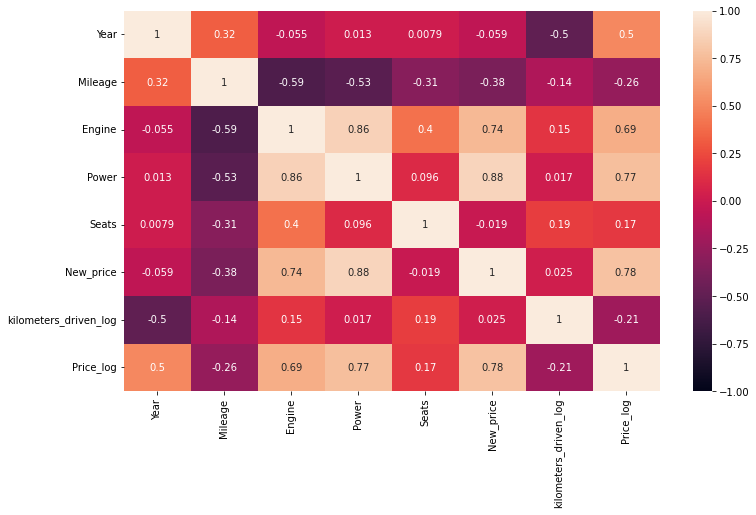

In [40]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(["Price","Kilometers_Driven"],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights:**

**Positive Correlation:
The variables Power and New_price have the strongest correlation with a value of 0.88. Next, variables Engine and Power had a strong correlation with a value of 0.86. Variables Power and Price_log and New_price and Price_log also had a somewhat strong correlation with a value of 0.78 and 0.77. Variables Year and Seats and Year and Power had the weakest correlation with a value of 0.0079 and 0.013. As these values are very small, they can be regarded as having no correlation at all.**

**Negative Correlation:
The variables Engine and Mileage have the strongest correlation with a value of -0.59. Next, variables Mileage and Power had a strong correlation with a value of -0.53. Variables New_price and Seats and Year and Engine had the weakest correlation with a value of -0.019 and -0.055. As these values are very small, they can be regarded as having no correlation at all.
The variable Mileage is almost negatively correlated with almost all variables except Manufacuring Year of the car.**

### **3. Box plot**

In [41]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

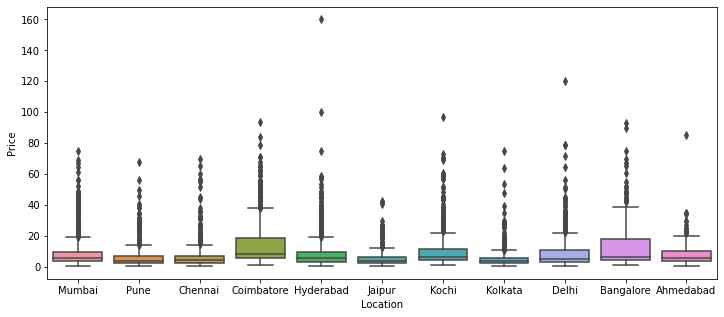

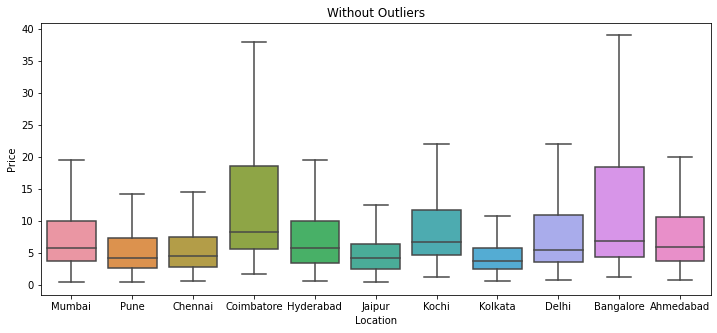

In [42]:
# Box Plot: Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

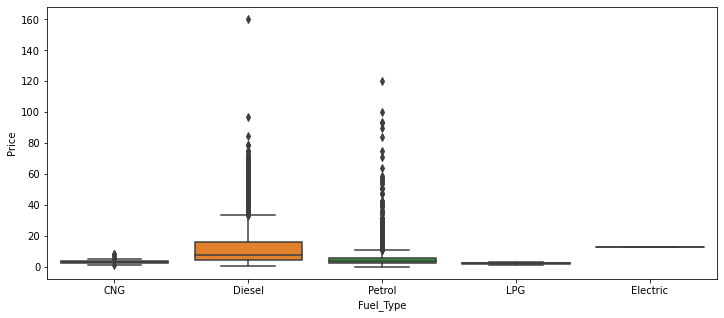

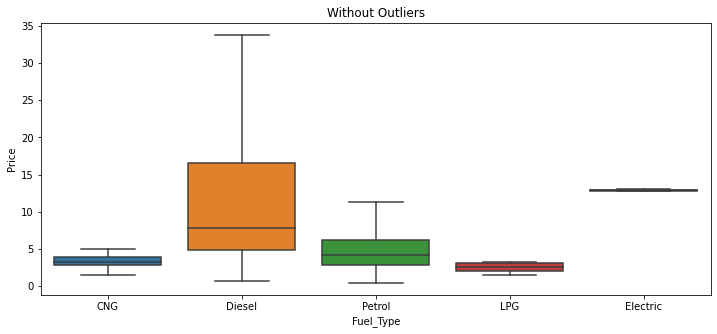

In [43]:
boxplot(data['Fuel_Type'])

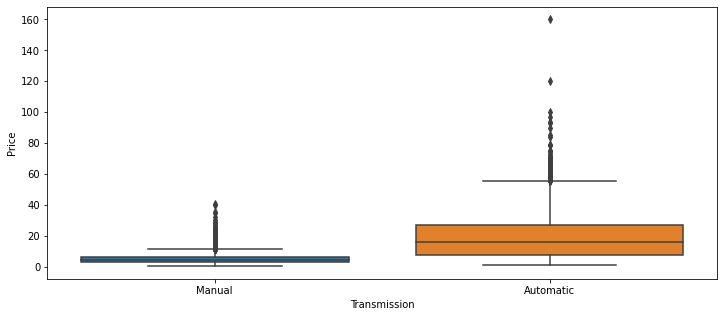

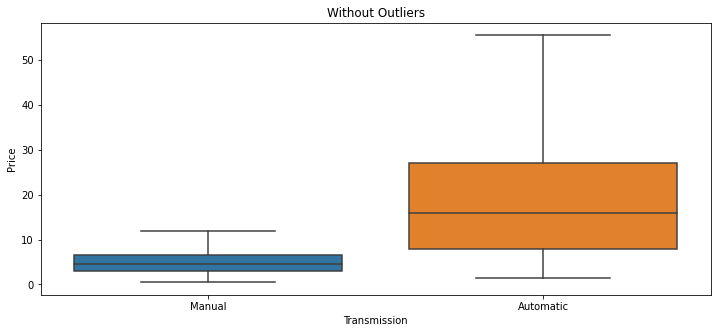

In [44]:
boxplot(data['Transmission'])

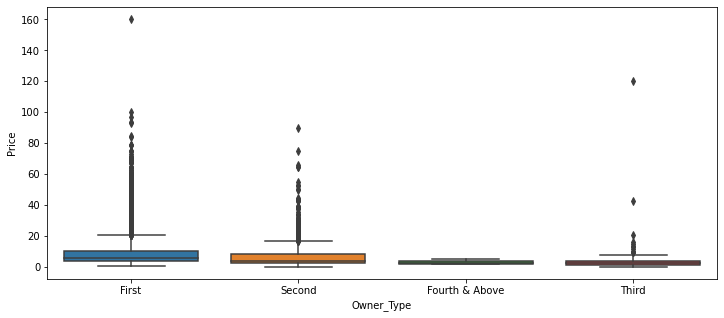

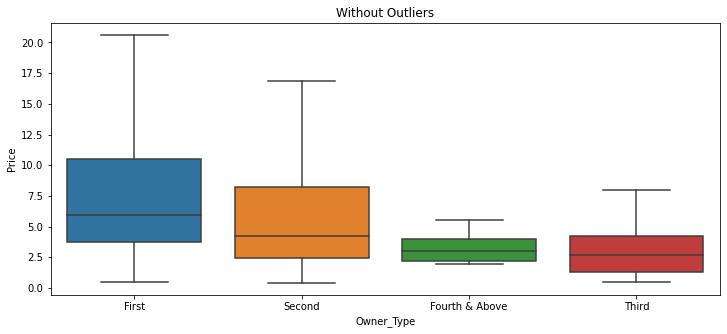

In [45]:
boxplot(data['Owner_Type'])

**Observations and Insights for all plots:
Using all these boxplots, we can clearly see that presence of too many outliers may cause range of the data to increase considerably. For all the variables and their respective categories, outliers caused the data to expand.**


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

### **Missing value treatment**

In [46]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
dtype: int64

**Missing values in Seats**

In [47]:
# Checking missing values in the column 'Seats'
data["Seats"].isnull().sum()

53

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [48]:
# Impute missing values in Seats,you can use fillna method in pandas
print(data.groupby(['Name'])['Seats'].median().sort_values(ascending=False))
data['Seats'] = data["Seats"].fillna(data.groupby(['Name'])['Seats'].median())

Name
Tata Sumo DX                             10.0
Toyota Qualis RS E2                      10.0
Toyota Qualis FS B3                      10.0
Toyota Qualis FS B2                      10.0
Chevrolet Tavera LS B3 10 Seats BSIII    10.0
                                         ... 
Maruti Swift 1.3 VXi                      NaN
Maruti Swift 1.3 ZXI                      NaN
Maruti Wagon R Vx                         NaN
Skoda Laura 1.8 TSI Ambition              NaN
Toyota Etios Liva Diesel TRD Sportivo     NaN
Name: Seats, Length: 2041, dtype: float64


In [49]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data["Seats"].isnull().sum()

53

**Missing values for Mileage**

In [50]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
dtype: int64

In [51]:
# Impute missing Mileage. For example, use can use median or any other methods.
print(((data["Mileage"]== "NaN")== False).count())
data['Mileage'] = data["Mileage"].fillna(data["Mileage"].median())

7252


In [52]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data["Mileage"].isnull().sum()

0

**Missing values for Engine**

In [53]:
data['Engine'] = data["Engine"].fillna(data["Engine"].median())

In [54]:
data["Engine"].isnull().sum()

0

**Missing values for Power**

In [55]:
data['Power'] = data["Power"].fillna(data["Power"].median())

In [56]:
data["Power"].isnull().sum()

0

**Missing values for New_price**

In [57]:
data['New_price'] = data["New_price"].fillna(data["New_price"].median())

In [59]:
data["New_price"].isnull().sum()

1234

**Observations for missing values after imputing: Finally, we have replaced omitted all the missing values with a certain value. Now, the data is ready to be divided into test and train data sets. We can then create a regression model using train data set, and measure performance by applying the model to the test dataset. We will do this in a separate notebook**

### **Saving the Data**

In [ ]:
# Assume df_cleaned is the pre-processed data frame in your code, then
data.to_csv("cars_data_updated.csv", index = False)

### **Let us load the data**

**Note:** Please load the data frame that was saved here before separating the data, and then proceed to the next step in Milestone 2.

### **Load the data**

In [2]:
import pandas as pd
import numpy as np

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics


cars_data = pd.read_csv("cars_data_updated.csv")
print(cars_data["Price"].isnull().sum())

1234


In [3]:
import pandas as pd
import numpy as np

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics


cars_data = pd.read_csv("cars_data_updated.csv")
cars_data.head()
cars_data['Price'] = cars_data["Price"].fillna(cars_data["Price"].median())
cars_data['Price_log'] = cars_data["Price_log"].fillna(cars_data["Price_log"].median())

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [4]:
# Step-1
X = cars_data.drop(['Name','Price','Price_log','Kilometers_Driven'], axis = 1)

y = cars_data[["Price_log", "Price"]]

In [5]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)
X

,Year,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,998.0,58.16,5.0,11.57,11.184421,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,19.67,1582.0,126.20,5.0,11.57,10.621327,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,18.20,1199.0,88.70,5.0,8.61,10.736397,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,20.77,1248.0,88.76,7.0,11.57,11.373663,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,15.20,1968.0,140.80,5.0,11.57,10.613246,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,2011,20.54,1598.0,103.60,5.0,11.57,11.400999,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7248,2015,17.21,1197.0,103.60,5.0,11.57,10.985293,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7249,2012,23.08,1461.0,63.10,5.0,11.57,10.239960,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7250,2013,17.20,1197.0,103.60,5.0,11.57,10.864025,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [6]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(5076, 25) (2176, 25)


In [7]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [8]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [9]:
# Create a linear regression model
lr = LinearRegression()

In [10]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

LinearRegression()

In [11]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.577527371521714
R-square on test set :  0.6987319908799025
RMSE on training set :  6.663385166697938
RMSE on test set :  5.664233908119423


<AxesSubplot:xlabel='Price_log'>

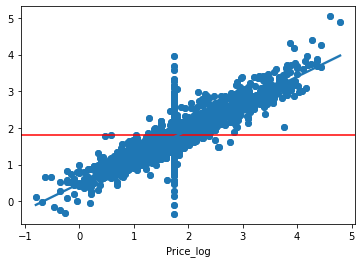

In [87]:
#Predicting values of y using Linear Regression model
predictions=lr.predict(X_test)
import matplotlib.pyplot as plt
y_base = cars_data["Price_log"].mean()
#Plotting base line model on the mean of target variable i.e. Price_log
plt.axhline(y=y_base, color='r', linestyle='-')
#Plotting scatter plot to observe the correlation between predicted values and the test dataset value
import seaborn as sns

plt.scatter(y_test["Price_log"],predictions)
sns.regplot(y_test["Price_log"],predictions)

**Important variables of Linear Regression**

Building a model using statsmodels.

In [11]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     571.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:47:14   Log-Likelihood:                -2705.6
No. Observations:                5076   AIC:                             5461.
Df Residuals:                    5051   BIC:                             5624.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [12]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [13]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Owner_Type_Fourth & Above,0.260328,4.871926e-02
Owner_Type_Second,-0.034705,4.533542e-02
Location_Hyderabad,0.084504,1.322532e-02
Location_Bangalore,0.096966,1.146321e-02
Fuel_Type_Diesel,0.206074,7.958485e-04
Owner_Type_Third,-0.185148,2.619032e-05
Location_Kolkata,-0.197692,3.532895e-08
Mileage,-0.012031,6.537502e-09
kilometers_driven_log,-0.063330,4.152066e-09
Engine,0.000181,5.934075e-12


In [14]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []

for col in mp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in olsmod[pval_filter].index:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical variables of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical variables of LINEAR REGRESSION  are  :
 ['Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Location_Hyderabad', 'Location_Bangalore', 'Location_Kolkata', 'Fuel_Type_Diesel', 'Mileage', 'kilometers_driven_log', 'Engine', 'Transmission_Manual', 'Power', 'const', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [65]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [66]:
# Create a Ridge regression model
ridge = Ridge()

In [67]:
# Fit Ridge regression model
ridge.fit(X_train, y_train['Price_log']) 

Ridge()

In [68]:
# Get score of the model
Ridge_score = get_model_score(ridge)

R-sqaure on training set :  0.5773582694733692
R-square on test set :  0.6986083703435905
RMSE on training set :  6.6647186014256095
RMSE on test set :  5.665395903081499


<AxesSubplot:xlabel='Price_log'>

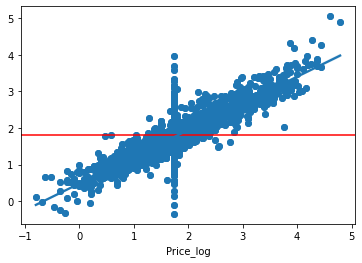

In [108]:
#Predicting values of y using Ridge Regularization model
predictions=ridge.predict(X_test)
import matplotlib.pyplot as plt
y_base = cars_data["Price_log"].mean()
#Plotting base line model on the mean of target variable i.e. Price_log
plt.axhline(y=y_base, color='r', linestyle='-')
#Plotting scatter plot to observe the correlation between predicted values and the test dataset value
import seaborn as sns

plt.scatter(y_test["Price_log"],predictions)
sns.regplot(y_test["Price_log"],predictions)

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [70]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [71]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(max_depth = 2, random_state = 1)

In [72]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(max_depth=2, random_state=1)

In [73]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.3822770859018879
R-square on test set :  0.3847280890925473
RMSE on training set :  8.057354748029896
RMSE on test set :  8.094652605735464


<AxesSubplot:xlabel='Price_log'>

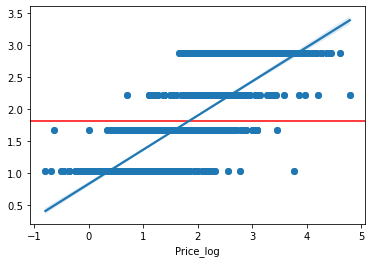

In [107]:
#Predicting values of y using Decision Tree model
predictions=dtree.predict(X_test)
import matplotlib.pyplot as plt
y_base = cars_data["Price_log"].mean()
#Plotting base line model on the mean of target variable i.e. Price_log
plt.axhline(y=y_base, color='r', linestyle='-')
#Plotting scatter plot to observe the correlation between predicted values and the test dataset value
import seaborn as sns

plt.scatter(y_test["Price_log"],predictions)
sns.regplot(y_test["Price_log"],predictions)

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [23]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.748318
Year                       0.251682
Location_Kochi             0.000000
Owner_Type_Second          0.000000
Owner_Type_Fourth & Above  0.000000
Transmission_Manual        0.000000
Fuel_Type_Petrol           0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000
Fuel_Type_Diesel           0.000000
Location_Pune              0.000000
Location_Mumbai            0.000000
Location_Kolkata           0.000000
Location_Jaipur            0.000000
Mileage                    0.000000
Location_Hyderabad         0.000000
Location_Delhi             0.000000
Location_Coimbatore        0.000000
Location_Chennai           0.000000
Location_Bangalore         0.000000
kilometers_driven_log      0.000000
New_price                  0.000000
Seats                      0.000000
Engine                     0.000000
Owner_Type_Third           0.000000


### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [96]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [97]:
# Create a Randomforest regression model
regr = RandomForestRegressor(max_depth =3)

In [98]:
# Fit Randomforest regression model
regr.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=3)

In [99]:
# Get score of the model
regr_model = get_model_score(regr)

R-sqaure on training set :  0.5498805152415995
R-square on test set :  0.5287504954148463
RMSE on training set :  6.877958259502262
RMSE on test set :  7.084188752383169


<AxesSubplot:xlabel='Price_log'>

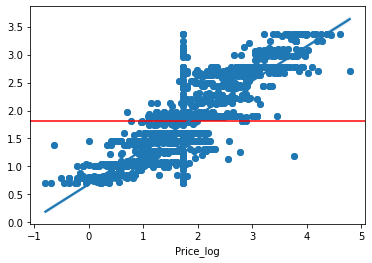

In [109]:
#Predicting values of y using Random Forest model
predictions=regr.predict(X_test)
import matplotlib.pyplot as plt
y_base = cars_data["Price_log"].mean()
#Plotting base line model on the mean of target variable i.e. Price_log
plt.axhline(y=y_base, color='r', linestyle='-')
#Plotting scatter plot to observe the correlation between predicted values and the test dataset value
import seaborn as sns

plt.scatter(y_test["Price_log"],predictions)
sns.regplot(y_test["Price_log"],predictions)

**Feature Importance**

In [28]:
# Print important features similar to decision trees
print(pd.DataFrame(regr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.767780
Year                       0.223399
Engine                     0.008485
Transmission_Manual        0.000336
Location_Kolkata           0.000000
Owner_Type_Second          0.000000
Owner_Type_Fourth & Above  0.000000
Fuel_Type_Petrol           0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000
Fuel_Type_Diesel           0.000000
Location_Pune              0.000000
Location_Mumbai            0.000000
Location_Jaipur            0.000000
Location_Kochi             0.000000
Mileage                    0.000000
Location_Hyderabad         0.000000
Location_Delhi             0.000000
Location_Coimbatore        0.000000
Location_Chennai           0.000000
Location_Bangalore         0.000000
kilometers_driven_log      0.000000
New_price                  0.000000
Seats                      0.000000
Owner_Type_Third           0.000000


### **Hyperparameter Tuning: Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn import metrics
# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters ={'max_depth': np.arange(2, 10), 
              'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            }


# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, cv = 10, n_jobs = -1)
grid_obj.fit(X_train, y_train['Price_log'])
# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train,y_train['Price_log'])

DecisionTreeRegressor(max_depth=5, random_state=1)

In [30]:
# Get score of the dtree_tuned
grid_obj.best_score_

0.6847769662611392

**Feature Importance**

In [31]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.696499
Year                       0.245440
Engine                     0.045008
Mileage                    0.005837
Transmission_Manual        0.004266
kilometers_driven_log      0.002051
Owner_Type_Third           0.000899
Location_Bangalore         0.000000
Location_Chennai           0.000000
Owner_Type_Second          0.000000
Owner_Type_Fourth & Above  0.000000
Seats                      0.000000
Fuel_Type_Petrol           0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000
Fuel_Type_Diesel           0.000000
Location_Pune              0.000000
Location_Mumbai            0.000000
Location_Kolkata           0.000000
Location_Kochi             0.000000
New_price                  0.000000
Location_Hyderabad         0.000000
Location_Delhi             0.000000
Location_Coimbatore        0.000000
Location_Jaipur            0.000000


### **Hyperparameter Tuning: Random Forest**

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
rf_estimator_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
parameters =  {'bootstrap' : [True,False],
    'max_depth': [2,4],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,5],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num =10)]}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, param_grid = parameters, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train["Price_log"])

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [52]:
#Fitting to the model
rf_estimator_tuned_base.fit(X_train,y_train['Price_log'])

RandomForestRegressor(max_depth=4, n_estimators=41, random_state=1)

In [53]:
# Get score of the model
grid_obj.best_score_

0.6866870194806449

**Feature Importance**

In [54]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_estimator_tuned_base.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.737295
Year                       0.232314
Engine                     0.021384
Seats                      0.003045
kilometers_driven_log      0.001934
Transmission_Manual        0.001383
Fuel_Type_Diesel           0.001154
Mileage                    0.000497
Fuel_Type_Petrol           0.000466
New_price                  0.000314
Location_Kolkata           0.000123
Location_Bangalore         0.000091
Owner_Type_Second          0.000000
Owner_Type_Fourth & Above  0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000
Location_Jaipur            0.000000
Location_Pune              0.000000
Location_Mumbai            0.000000
Location_Kochi             0.000000
Location_Hyderabad         0.000000
Location_Delhi             0.000000
Location_Coimbatore        0.000000
Location_Chennai           0.000000
Owner_Type_Third           0.000000


In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=10)

In [102]:
knn.fit(X_train, y_train["Price_log"])

KNeighborsRegressor(n_neighbors=10)

In [103]:
knn_model = get_model_score(knn)

R-sqaure on training set :  0.680484755385159
R-square on test set :  0.6265162578238457
RMSE on training set :  5.794839626911584
RMSE on test set :  6.3066760220676725


<AxesSubplot:xlabel='Price_log'>

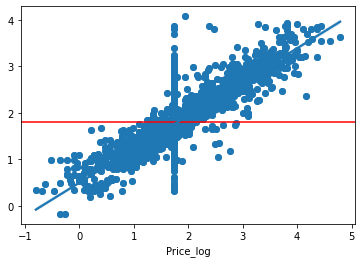

In [110]:
#Predicting values of y using KNN model
predictions=knn.predict(X_test)
import matplotlib.pyplot as plt
y_base = cars_data["Price_log"].mean()
#Plotting base line model on the mean of target variable i.e. Price_log
plt.axhline(y=y_base, color='r', linestyle='-')
#Plotting scatter plot to observe the correlation between predicted values and the test dataset value
import seaborn as sns

plt.scatter(y_test["Price_log"],predictions)
sns.regplot(y_test["Price_log"],predictions)

In [59]:
# Defining list of models you have trained
models = [lr, dtree, ridge, regr,knn]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [60]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Ridge Regularization', 'Random Forest',"KNN"], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.577527,0.698732,6.663385,5.664234
1,Decision Tree,0.382277,0.384728,8.057355,8.094653
2,Ridge Regularization,0.577358,0.698608,6.664719,5.665396
3,Random Forest,0.539156,0.522857,6.959412,7.128346
4,KNN,0.680485,0.626516,5.794840,6.306676
